In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.cross_validation import StratifiedKFold, cross_val_score, LeaveOneOut, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load train and test dataset

In [3]:
train = pd.read_csv('..../train.csv',index_col= 'Loan_ID')
test = pd.read_csv('...../test.csv',index_col= 'Loan_ID')

In [4]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 12)

In [6]:
test.shape

(367, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [8]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


#### Let's check the loan status

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

422 loans have been approved and 192 have not been approved

In [12]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [13]:
train['LoanAmount'].median()

128.0

In [14]:
train['LoanAmount'].fillna(128, inplace=True)

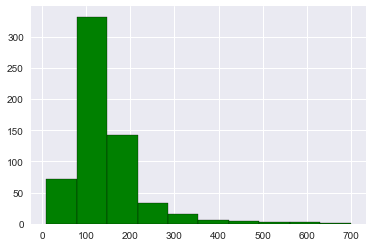

In [15]:
plt.hist(train['LoanAmount'],ec='black', color='g')
plt.show()

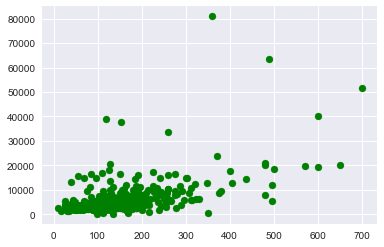

In [16]:
plt.scatter(train['LoanAmount'],train['ApplicantIncome'], color='g')

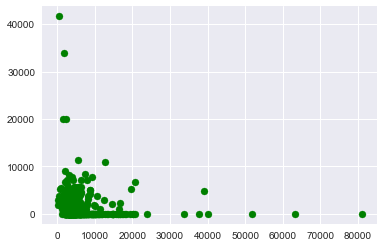

In [17]:
plt.scatter(train['ApplicantIncome'],train['CoapplicantIncome'], color='g')

(array([ 533.,   59.,   15.,    0.,    4.,    0.,    1.,    1.,    0.,    1.]),
 array([   150.,   8235.,  16320.,  24405.,  32490.,  40575.,  48660.,
         56745.,  64830.,  72915.,  81000.]),
 <a list of 10 Patch objects>)

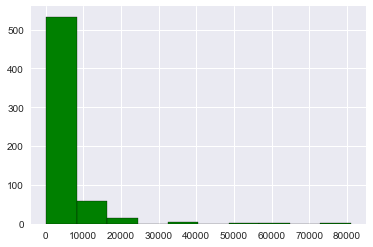

In [18]:
plt.hist(train['ApplicantIncome'], ec='black', color='g')

In [19]:
train[train['ApplicantIncome' ] >30000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


(array([   3.,    6.,    3.,   44.,    4.,    0.,   13.,  512.,    0.,   15.]),
 array([  12. ,   58.8,  105.6,  152.4,  199.2,  246. ,  292.8,  339.6,
         386.4,  433.2,  480. ]),
 <a list of 10 Patch objects>)

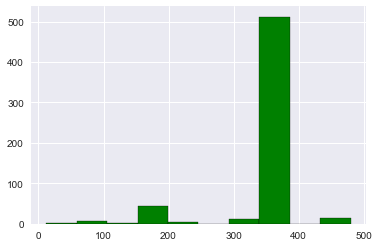

In [20]:
plt.hist(train['Loan_Amount_Term'].dropna(), color='g', ec='black')

In [21]:
train['Loan_Amount_Term'].median()

360.0

In [22]:
train['Loan_Amount_Term'].fillna(360, inplace=True)

In [23]:
train['Credit_History'].fillna(1, inplace=True)

In [24]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [25]:
train['Gender'].isnull().values.sum()
train['Gender'].fillna(1, inplace=True)

In [26]:
train.loc[(train.Gender== 'Male') ,'Gender' ] = 1
train.loc[(train.Gender== 'Female') ,'Gender' ] = 0

(array([ 112.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  502.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

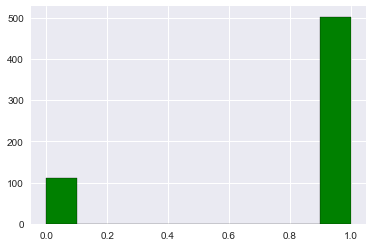

In [27]:
plt.hist(train['Gender'],color='g',ec='black')

In [28]:
train['Married']=(train.Married=='No')*1
test['Married']=(test.Married=='No')*1

In [29]:
train['Self_Employed']=(train.Self_Employed=='Yes')*1
test['Self_Employed']=(test.Self_Employed=='Yes')*1

In [30]:
education_map={'Graduate': 1, 'Not Graduate' : 2}
train['Education'] = train.Education.map(education_map)
test['Education'] = test.Education.map(education_map)

In [31]:
property_area_mapping={'Urban': 1, 'Rural' : 2, 'Semiurban':3}
train['Property_Area'] = train.Education.map(property_area_mapping)
train['Property_Area'] = train.Education.map(property_area_mapping)
train['Property_Area']=train.Property_Area.fillna(1)
test['Property_Area']=test.Property_Area.fillna(1)

In [32]:
train['LoanAmount']=(train.LoanAmount.fillna(train.LoanAmount.mean()))
test['LoanAmount']=(test.LoanAmount.fillna(test.LoanAmount.mean()))

In [33]:
train['Loan_Amount_Term']=(train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean()))
test['Loan_Amount_Term']=(test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean()))

In [34]:
train['Credit_History']=train.Credit_History.fillna(1)
test['Credit_History']=test.Credit_History.fillna(1)

df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df['Married'] = df['Married'].map({'No':0, 'Yes':1})
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Urban':3, 'Semiurban':2, 'Rural':1})
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1})

Data Visualization

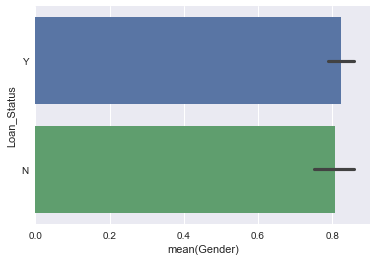

In [35]:
sns.barplot(x='Gender',y='Loan_Status',data=train)

In [36]:
train.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0
mean,0.346906,1.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.0
std,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.0
min,0.000000,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.0
50%,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.0
75%,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.0
max,1.000000,2.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.0


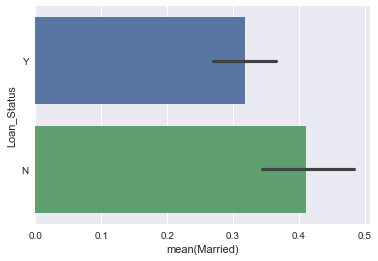

In [37]:
sns.barplot(x='Married',y='Loan_Status',data=train)

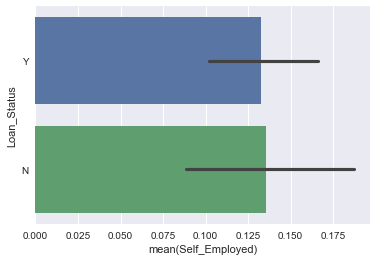

In [38]:
sns.barplot(x='Self_Employed',y='Loan_Status',data=train)

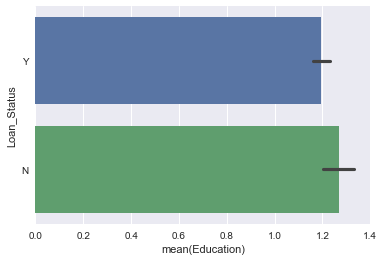

In [39]:
sns.barplot(x='Education',y='Loan_Status',data=train)

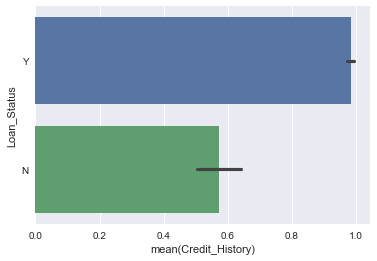

In [40]:
sns.barplot(x='Credit_History',y='Loan_Status',data=train)

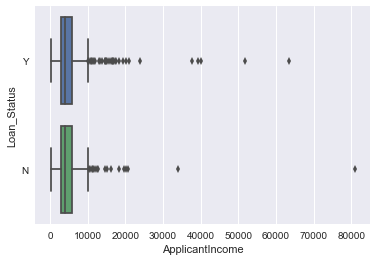

In [41]:
sns.boxplot(x='ApplicantIncome',y='Loan_Status',data=train)

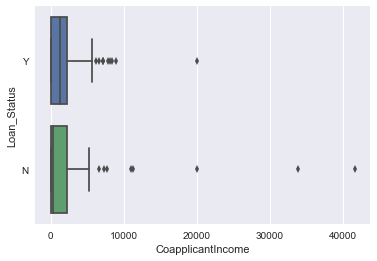

In [42]:
sns.boxplot(x='CoapplicantIncome',y='Loan_Status',data=train)

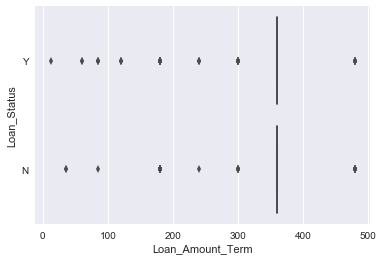

In [43]:
sns.boxplot(x='Loan_Amount_Term',y='Loan_Status',data=train)

In [44]:
test_loan_ids = test.index

In [45]:
features = train.columns.drop(['Dependents','Loan_Status'])

train_target = train.Loan_Status
train = train[features]

test = test[features]

In [46]:
X_train, X_test,y_train,y_test = train_test_split(train,train_target, test_size=0.2, random_state = 0)

In [47]:
X_train.shape, X_test.shape

((491, 10), (123, 10))

In [48]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)


In [49]:
X_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
LP002453,1,1,1,1,7085,0.0,84.0,360.0,1.0,1.0
LP001164,0,1,1,0,4230,0.0,112.0,360.0,1.0,1.0
LP002734,1,0,1,0,6133,3906.0,324.0,360.0,1.0,1.0
LP002505,1,0,1,0,4333,2451.0,110.0,360.0,1.0,1.0
LP001194,1,0,1,0,2708,1167.0,97.0,360.0,1.0,1.0


In [50]:
X_test_std

array([[ 0.46671381,  1.25      , -0.51772699, ...,  0.28661682,
         0.3866946 ,  0.        ],
       [-2.14264068,  1.25      , -0.51772699, ...,  0.28661682,
         0.3866946 ,  0.        ],
       [ 0.46671381, -0.8       , -0.51772699, ...,  0.28661682,
         0.3866946 ,  0.        ],
       ..., 
       [ 0.46671381, -0.8       , -0.51772699, ...,  0.28661682,
         0.3866946 ,  0.        ],
       [ 0.46671381, -0.8       ,  1.93151993, ..., -2.33124469,
        -2.58602011,  0.        ],
       [ 0.46671381, -0.8       , -0.51772699, ...,  0.28661682,
         0.3866946 ,  0.        ]])

In [51]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
LP001002,1,1,1,0,5849,0.0,128.0,360.0,1.0,1.0
LP001003,1,0,1,0,4583,1508.0,128.0,360.0,1.0,1.0
LP001005,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0
LP001006,1,0,2,0,2583,2358.0,120.0,360.0,1.0,1.0
LP001008,1,1,1,0,6000,0.0,141.0,360.0,1.0,1.0


# Modelling

Random forest

In [52]:
forest = RandomForestClassifier(n_estimators = 700,n_jobs=-1,criterion = 'entropy')
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [53]:
predictions_forest = forest.predict(X_test)

In [54]:
forest = RandomForestClassifier(n_estimators = 700,n_jobs=-1,criterion = 'gini')
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [55]:
predictions_forest = forest.predict(X_test)

Decision Tree Classifier using Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
ada= AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=0.1,random_state= 42)


In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
eclf = VotingClassifier(estimators=[('forest',forest),('adaboost',ada)],voting='hard')

In [59]:
eclf.fit(X_train,y_train)

VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
          ...ndom_state=None, splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=42))],
         n_jobs=1, voting='hard', weights=None)

In [60]:
y_test_pred = eclf.predict(X_test)
y_test_pred

array(['N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'Y'], dtype=object)

Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)
'Training accuracy:', lr.score(X_train_std,y_train)

('Training accuracy:', 0.8044806517311609)

In [62]:
'Test Accuracy:', lr.score(X_test_std,y_test)

('Test Accuracy:', 0.82926829268292679)

In [63]:
lr.intercept_

array([ 0.62033624])

In [64]:
lr.coef_[0]

array([ 0.        , -0.05174582, -0.04162947,  0.        ,  0.        ,
       -0.0662163 ,  0.        ,  0.        ,  1.19170786,  0.        ])

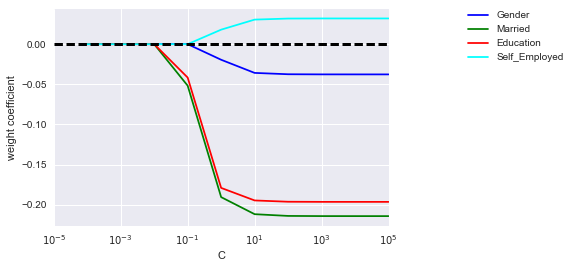

In [65]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**float(c), random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**float(c))

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X_train.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [66]:
X_train.head(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
LP001316,1,0,1,0,2958,2900.0,131.0,360.0,1.0,1.0
LP002729,1,1,1,0,11250,0.0,196.0,360.0,1.0,1.0
LP002448,1,0,1,0,3948,1733.0,149.0,360.0,0.0,1.0


In [67]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

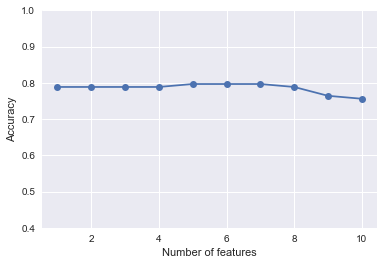

In [68]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# selecting features
sbs = SBS(gbc, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.4, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show();

In [69]:
k2 = list(sbs.subsets_[5])
X_train.columns[k2]

Index(['Gender', 'Married', 'Self_Employed', 'LoanAmount', 'Credit_History'], dtype='object')

 1) Credit_History                 0.268583
 2) ApplicantIncome                0.253403
 3) LoanAmount                     0.218958
 4) CoapplicantIncome              0.131495
 5) Loan_Amount_Term               0.042412
 6) Education                      0.023350
 7) Married                        0.022864
 8) Self_Employed                  0.020555
 9) Gender                         0.018381
10) Property_Area                  0.000000


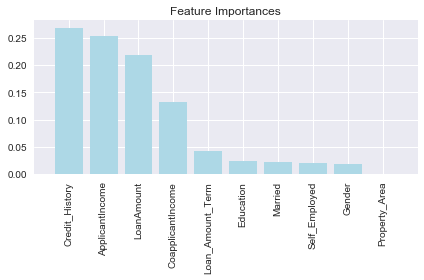

In [70]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_train.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [71]:
feat = ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']

forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy', min_samples_leaf=5, min_weight_fraction_leaf=.1)
forest.fit(X_train[feat], y_train)

'Training accuracy:', forest.score(X_train[feat], y_train)


('Training accuracy:', 0.8044806517311609)

In [72]:
'Test accuracy:', forest.score(X_test[feat], y_test)

('Test accuracy:', 0.82926829268292679)